# Week 5, Data science in Neuroscience


## Plan for this week

1. Introduction to pytorch
2. Tensors
3. Train a linear model with pytorch
4. Train a simple neural network with pytorch
5. A convolutional network to process images (second session)

***
## pytorch installation

You will need to install the pytorch library to run the content of this notebook. There are instructions for installing pytorch on Windows computers [here](https://github.com/kevin-allen/dataScienceNeuro/blob/main/installation.md)

Alternatively, you could use Google Colab to run the notebook. You will need to follow the instructions [here](https://github.com/kevin-allen/dataScienceNeuro/blob/main/colab.md) to load data files from Google Colab.  

*** 
## Deep neural networks

* Mathematical entities capable of representing complicated functions through a composition of simpler functions.
* Deep neural network have **multiple layers** between the input and output layers. 
* Each layer has several artificial neurons. 
* New data comes from the left, and calculations propagates towards the ouput layer.


<div>
<img src="../images/deep-neural-network.png" width="500"/>
</div>




***
## Artificial neuron

A **neuron** is the building block of the neural network.


They do 3 things: 
* A linear transofrmation of the inputs
* Adding a constant 
* Applying a fixed nonlinear function (activation fucntion)
    
The input can be a single value or a vector. The output can be a single value or a vector.
***
### Linear model 

<img src="../images/neuron_linear.png" width="500" align="center">

***

### Artificial neuron



<img src="../images/artificial_neuron.png" width="500" align="center">

***
<div>
<img src="../images/pytorch.png" width="400"/>
</div>

Pytorch is a Python library that facilitates building deep learning projects

* Store data into Tensors (multidimensional arrays that are similar to NumPy arrays)
* Allows fast calculations on dedicated hardware (GPUs)
* Ability of tensors to keep track of the operations performed on them and to analytically compute derivatives
* Classes to deal with datasets
* Classes to simplify building deep neural networks

# Tensors

pytorch tensors are very similar to NumPy arrays. They have 2 main advantages

* Used to do calculations on a GPU
* Can keep track of the graph of computations that created them (used to calculate derivatives) 

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Creating tensors

In [5]:
torch.ones(5)

tensor([1., 1., 1., 1., 1.])

In [6]:
torch.zeros(3,4)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [7]:
a = torch.tensor([[1.0,2],[3,4]])
a

tensor([[1., 2.],
        [3., 4.]])

You can interrogate a tensor just like a NumPy array.

In [8]:
print("shape:", a.shape)
print("ndim:", a.ndim)
print("dtype:", a.dtype)

shape: torch.Size([2, 2])
ndim: 2
dtype: torch.float32


You can generate random numbers with `torch.rand()`. You can change the shape of an array with `.reshape()`. Many of the mathematical functions of NumPy have a torch equivalent.

In [9]:
b = torch.rand(24).reshape(4,6)
b

tensor([[0.6144, 0.4495, 0.4905, 0.4258, 0.7809, 0.3953],
        [0.3718, 0.4750, 0.0327, 0.2532, 0.8423, 0.9509],
        [0.0725, 0.4664, 0.7375, 0.9218, 0.6229, 0.7245],
        [0.2329, 0.7277, 0.5285, 0.8302, 0.2308, 0.5957]])

In [10]:
b.shape

torch.Size([4, 6])

In [11]:
b.mean()

tensor(0.5322)

In [12]:
b.mean(axis=0)

tensor([0.3229, 0.5297, 0.4473, 0.6077, 0.6192, 0.6666])

We can add an extra dimension with a size of 1 using `.unsqueeze()`.

In [13]:
b.shape

torch.Size([4, 6])

In [14]:
b.unsqueeze(0).shape

torch.Size([1, 4, 6])

We can do broadcasting, just like with NumPy arrays.

```
When operating on two arrays, pytorch compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are compatible when
​
* they are equal, or
* one of them is 1
```


In [15]:
b.shape

torch.Size([4, 6])

In [16]:
a = torch.ones(4)
a.shape

torch.Size([4])

In [17]:
#b+a

We can add a dimension of size 1 with `.unsqeeze()`

In [18]:
A = a.unsqueeze(1)
A.shape

torch.Size([4, 1])

In [19]:
b+A

tensor([[1.6144, 1.4495, 1.4905, 1.4258, 1.7809, 1.3953],
        [1.3718, 1.4750, 1.0327, 1.2532, 1.8423, 1.9509],
        [1.0725, 1.4664, 1.7375, 1.9218, 1.6229, 1.7245],
        [1.2329, 1.7277, 1.5285, 1.8302, 1.2308, 1.5957]])

We can get rid of a dimension of size 1 with `.squeeze()`

In [20]:
A.shape, A.squeeze().shape

(torch.Size([4, 1]), torch.Size([4]))

We can change the order of the dimensions in a tensor with `.permute()`

In [21]:
b.shape

torch.Size([4, 6])

In [22]:
b = torch.rand(3*24).reshape(3,4,6)
b

tensor([[[0.9656, 0.0686, 0.2223, 0.7485, 0.9397, 0.5746],
         [0.6957, 0.0254, 0.7154, 0.9803, 0.0938, 0.0272],
         [0.5540, 0.0975, 0.9018, 0.7650, 0.0212, 0.2413],
         [0.3560, 0.4634, 0.1063, 0.5530, 0.6958, 0.8216]],

        [[0.2891, 0.4564, 0.0447, 0.4715, 0.4863, 0.9990],
         [0.3606, 0.0761, 0.0202, 0.6726, 0.1827, 0.3111],
         [0.4392, 0.2306, 0.0045, 0.6453, 0.3220, 0.4096],
         [0.6244, 0.9414, 0.2097, 0.2999, 0.2815, 0.4804]],

        [[0.2132, 0.1623, 0.5651, 0.2427, 0.6943, 0.4653],
         [0.3209, 0.7887, 0.7925, 0.6457, 0.4517, 0.6494],
         [0.2721, 0.8276, 0.2742, 0.1945, 0.0182, 0.6407],
         [0.3551, 0.5891, 0.8204, 0.1065, 0.2127, 0.1689]]])

In [23]:
b.shape

torch.Size([3, 4, 6])

In [24]:
b = b.permute(1,2,0)
b.shape

torch.Size([4, 6, 3])

### Moving tensors to the GPU

Once you moved your tensors to the GPU, calculations on these tensors will be performed on the GPU. 

In [2]:
b = torch.rand(10)
b

tensor([0.6806, 0.8016, 0.9860, 0.6890, 0.3687, 0.4968, 0.6966, 0.6239, 0.8902,
        0.5927])

In [3]:
torch.cuda.is_available()

False

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

Using device: cpu



In [28]:
b

tensor([0.6645, 0.9570, 0.8701, 0.8357, 0.3523, 0.7404, 0.9919, 0.1667, 0.6684,
        0.1496])

In [29]:
b = b.to(device)

In [30]:
b

tensor([0.6645, 0.9570, 0.8701, 0.8357, 0.3523, 0.7404, 0.9919, 0.1667, 0.6684,
        0.1496])

In [31]:
b = b.to("cpu")
b

tensor([0.6645, 0.9570, 0.8701, 0.8357, 0.3523, 0.7404, 0.9919, 0.1667, 0.6684,
        0.1496])

In [32]:
#b = b.to("cuda")
#b

## From pytorch tensors to NumPy arrays and back

You can go between tensors and NumPy arrays using `torch.from_numpy()` and `myTensor.numpy()`

In [33]:
points_pt = torch.tensor([2,3,4])
print(type(points_pt))
points_np = points_pt.numpy()
print(type(points_np))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>


In [34]:
a = np.array([1,2,3,4])
torch.from_numpy(a)

tensor([1, 2, 3, 4])

***
# Training a linear model using pytorch

We will recreate our machine learning example of week 2 using pytorch.

We want to predict the firing rate of a neuron from the running speed of the animal.


In [7]:
fn = "../data/animal_speed.npy"

In [8]:
speed = np.load(fn)
speed = speed[0:100]

In [9]:
w = 1.25 # weight (slope)
b = 10 # bias (intercept)
np.random.seed(0)
e = np.random.normal(loc=0.0, scale=5, size = speed.shape[0]) # random numbers taken from a normal distribution

rate = speed* w + b + e # simulate the firing rate
rate = np.maximum(0, rate) # eliminate the negative firing rates

Text(0, 0.5, 'Firing rate (Hz)')

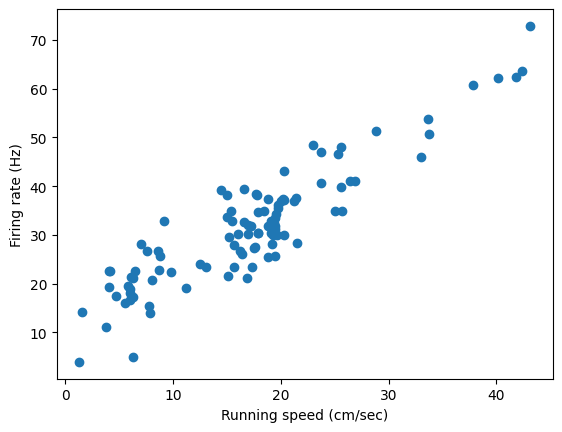

In [10]:
plt.scatter(speed,rate)
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")

### Create a model with pytorch

We will recreate our **linear regression model** using pytorch. 


$yhat = b+ w*X$


<img src="../images/neuron_linear.png" width="500" align="center">

https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

This is **not a neural network**, but a linear model.

In [12]:
import torch.nn as nn

class Lin_model(nn.Module):
    """
    Class to create pytorch model.
    """
    def __init__(self):
        """
        Initializer. Runs when an object is created
        """
        super().__init__()
        self.linLayer = nn.Linear(in_features=1, out_features=1, bias=True)
    def forward(self,x):
        """
        Make predictions with our model
        """
        out = self.linLayer(x)
        return out

We define our model using a class that inherits from `nn.Module`.

We will use a similar class definition for more complex models.

In [13]:
lin_model = Lin_model() # create model from our class definition

The parameters of the models are created automatically when creating the model.

We can use this for loop to print the parameters.

In [17]:
for name,p in lin_model.named_parameters():
    print(name, p)

linLayer.weight Parameter containing:
tensor([[-0.5640]], requires_grad=True)
linLayer.bias Parameter containing:
tensor([0.2238], requires_grad=True)


In [18]:
print("Number of parameters:", sum(p.numel() for p in lin_model.parameters()))

Number of parameters: 2


### Loss function

pytorch has built-in loss functions that we can use in our training loop. We will use the mean squared error (MSE).

In [19]:
# loss function returning MSE
loss_fn = torch.nn.MSELoss()

### pytorch optimizers

Optimizers are used to change our model parameters during learning.

There are several optimization strategies and tricks that can improve learning. 

There are more important when building deep neural networks than for linear regression models.

Let's see how to use the SGD optimizer.

In [20]:
import torch.optim as optim

In [22]:
learning_rate = 0.001
optimizer = optim.SGD(lin_model.parameters(),lr=learning_rate)

## Data format for our model

* X: input data
* y: labels or values that we want to predict


We need to store them in `tensors`.

X: Input data, the first dimension (rows) is for the observations. The second dimension is for features. We only have 1 input feature (speed), so the second dimension will have a size of 1.

y: The first dimension (rows) is for the observations. The second is for the output features. In this case, we have one output feature (firing rate)

In [25]:
X = torch.from_numpy(speed).unsqueeze(1).float()

In [26]:
X.shape

torch.Size([100, 1])

In [27]:
y = torch.from_numpy(rate).unsqueeze(1).float()
y.shape

torch.Size([100, 1])

### One forward pass 

We now all our needed element to train our model.

Before using our training loop, it is a good idea to run one forward pass outside of the for loop to identify potential problems.

We run all the steps that will be in our training loop.

In [28]:
for name,p in lin_model.named_parameters():
    print(name,p)

linLayer.weight Parameter containing:
tensor([[-0.5640]], requires_grad=True)
linLayer.bias Parameter containing:
tensor([0.2238], requires_grad=True)


In [30]:
yhat = lin_model(X)

In [32]:
loss =  loss_fn(yhat,y)

In [33]:
optimizer.zero_grad() # zero the gradients

In [34]:
loss.backward() # calculate gradients

In [35]:
optimizer.step() # will change the model parameters to reduce the loss        

In [36]:
for name,p in lin_model.named_parameters():
    print(name,p)

linLayer.weight Parameter containing:
tensor([[1.1331]], requires_grad=True)
linLayer.bias Parameter containing:
tensor([0.3060], requires_grad=True)


### Training loop

We want a generic training loop that will work in most situations.

In [37]:
## training loop that will modify our parameters to minimize the loss function (MSE)
def training_loop(n_epochs, optimizer, loss_fn, model, X,y):
    for epoch in range (n_epochs):
        
        yhat = model(X) # make predictions
        loss = loss_fn(yhat,y) # calculate the loss
        optimizer.zero_grad() # zero the gradients of our model's parameters
        loss.backward() # calculate gradients of the model's parameters
        optimizer.step() # will change the model parameters to reduce the loss
        
        
        if epoch % 1000 ==0 or epoch < 10:
            print("Epoch: {}, Loss: {}".format(epoch,loss))
    return

In [38]:
training_loop(n_epochs = 20000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=lin_model,
              X = X,
              y=y)

Epoch: 0, Loss: 170.02667236328125
Epoch: 1, Loss: 55.81074142456055
Epoch: 2, Loss: 48.57118225097656
Epoch: 3, Loss: 48.09504318237305
Epoch: 4, Loss: 48.04652786254883
Epoch: 5, Loss: 48.02507781982422
Epoch: 6, Loss: 48.00533676147461
Epoch: 7, Loss: 47.98573303222656
Epoch: 8, Loss: 47.966148376464844
Epoch: 9, Loss: 47.94658279418945
Epoch: 1000, Loss: 34.93854904174805
Epoch: 2000, Loss: 29.39569664001465
Epoch: 3000, Loss: 27.065502166748047
Epoch: 4000, Loss: 26.085895538330078
Epoch: 5000, Loss: 25.6740665435791
Epoch: 6000, Loss: 25.500938415527344
Epoch: 7000, Loss: 25.42815399169922
Epoch: 8000, Loss: 25.397554397583008
Epoch: 9000, Loss: 25.384687423706055
Epoch: 10000, Loss: 25.379281997680664
Epoch: 11000, Loss: 25.37700843811035
Epoch: 12000, Loss: 25.376054763793945
Epoch: 13000, Loss: 25.375652313232422
Epoch: 14000, Loss: 25.3754825592041
Epoch: 15000, Loss: 25.375411987304688
Epoch: 16000, Loss: 25.375383377075195
Epoch: 17000, Loss: 25.3753662109375
Epoch: 18000, 

In [39]:
for p in lin_model.parameters():
    print(p)

Parameter containing:
tensor([[1.2343]], requires_grad=True)
Parameter containing:
tensor([10.5678], requires_grad=True)


In [40]:
t_range = torch.arange(0,50,0.5).unsqueeze(1)
t_range.shape

torch.Size([100, 1])

In [41]:
lin_yhat = lin_model(t_range)

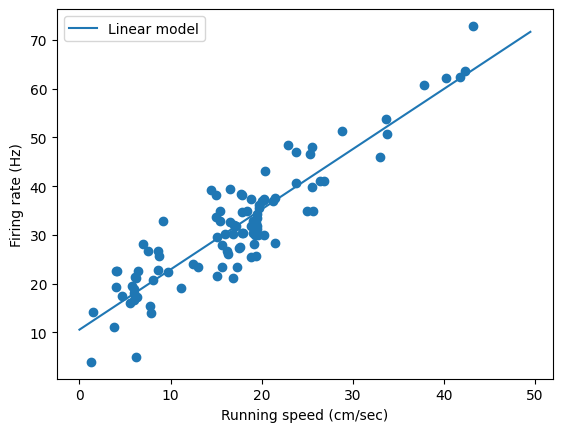

In [42]:
plt.scatter(speed,rate)
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

We found the parameters that were used to simulate the data.

# A first neural network

* Mathematical entities capable of representing complicated functions through a composition of simpler functions.
* Deep neural network have **multiple layers** between the input and output layers. 
* Each layer has several artificial neurons. 
* New data comes from the left, and calculations propagates towards the ouput layer.



***

* A neuron in a neural network has one more non-linear function. 

<img src="../images/artificial_neuron.png" width="500" align="center">

The non-linear function allows the model to have different slope at different values.

The non-linear function of the neuron is called the **activation function**.

Text(0.5, 1.0, 'Non-linear model: tanh(w*x+b)')

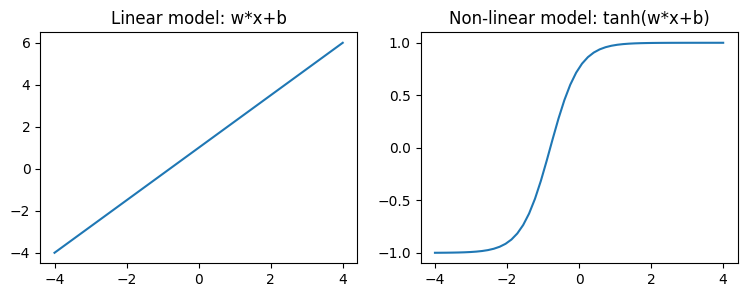

In [43]:
nrow=1
ncol=2
fig, ax = plt.subplots(nrow,ncol,figsize=(9,3))

XX = np.linspace(-4,4) # input
          
w=1.25
b=1.0
                
ax[0].plot(XX,w*XX+b)
ax[0].set_title("Linear model: w*x+b")

ax[1].plot(XX,np.tanh(w*XX+b))
ax[1].set_title("Non-linear model: tanh(w*x+b)")

In neural network, we have **several artificial neurons**. 

The output of several neurons is summed to get the output.

Let's build a neural network to predict the firing rate from the speed of the animal.

In [48]:
class NN_model(nn.Module):
    """
    Class to create pytorch model. This is a neural network because of the non-linear function.
    """
    def __init__(self):
        """
        Initializer. Runs when an object is created
        """
        super().__init__()
        self.layer1 = nn.Linear(in_features=1, out_features=5, bias=True)
        self.tanh = nn.Tanh()
        self.layer2 = nn.Linear(in_features=5, out_features=1, bias=True)
        
    def forward(self,x):
        """
        Make predictions with our model
        """
        out = self.layer1(x)
        out = self.tanh(out)
        out = self.layer2(out)
        return out

In [49]:
nn_model = NN_model()

In [50]:
for name, p in nn_model.named_parameters():
    print(name,p)

layer1.weight Parameter containing:
tensor([[0.7528],
        [0.2765],
        [0.1031],
        [0.3082],
        [0.0207]], requires_grad=True)
layer1.bias Parameter containing:
tensor([ 0.5394,  0.0220,  0.4581, -0.5057,  0.8088], requires_grad=True)
layer2.weight Parameter containing:
tensor([[-0.4071,  0.3502, -0.0772, -0.1134, -0.2120]], requires_grad=True)
layer2.bias Parameter containing:
tensor([0.2952], requires_grad=True)


In [51]:
print("Number of parameters:", sum(p.numel() for p in nn_model.parameters()))

Number of parameters: 16


In [52]:
learning_rate=0.0001
optimizer = optim.SGD(nn_model.parameters(),lr=learning_rate)

In [53]:
training_loop(n_epochs = 30000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=nn_model,
              X = X,
              y=y)

Epoch: 0, Loss: 1160.2049560546875
Epoch: 1, Loss: 1157.40673828125
Epoch: 2, Loss: 1154.2642822265625
Epoch: 3, Loss: 1150.309326171875
Epoch: 4, Loss: 1144.6085205078125
Epoch: 5, Loss: 1137.81982421875
Epoch: 6, Loss: 1132.7376708984375
Epoch: 7, Loss: 1129.0562744140625
Epoch: 8, Loss: 1126.03125
Epoch: 9, Loss: 1123.324951171875
Epoch: 1000, Loss: 232.6788330078125
Epoch: 2000, Loss: 115.29815673828125
Epoch: 3000, Loss: 85.64826202392578
Epoch: 4000, Loss: 71.67119598388672
Epoch: 5000, Loss: 62.58470153808594
Epoch: 6000, Loss: 59.68964385986328
Epoch: 7000, Loss: 55.27320861816406
Epoch: 8000, Loss: 51.11891174316406
Epoch: 9000, Loss: 49.657875061035156
Epoch: 10000, Loss: 62.02762222290039
Epoch: 11000, Loss: 47.7774772644043
Epoch: 12000, Loss: 42.643489837646484
Epoch: 13000, Loss: 39.97211456298828
Epoch: 14000, Loss: 38.0668830871582
Epoch: 15000, Loss: 36.59050750732422
Epoch: 16000, Loss: 35.4085807800293
Epoch: 17000, Loss: 34.446510314941406
Epoch: 18000, Loss: 33.655

In [54]:
for name, p in nn_model.named_parameters():
    print(name,p)

layer1.weight Parameter containing:
tensor([[ 0.6184],
        [ 0.6331],
        [ 0.0659],
        [ 0.1159],
        [-0.1754]], requires_grad=True)
layer1.bias Parameter containing:
tensor([ 0.3312, -0.2621,  0.3314, -1.2805,  4.7678], requires_grad=True)
layer2.weight Parameter containing:
tensor([[ 9.0461,  9.8071,  9.3307,  9.1021, -9.8570]], requires_grad=True)
layer2.bias Parameter containing:
tensor([9.7333], requires_grad=True)


### Let's compare our linear model with our small neural network

In [55]:
t_range = torch.arange(0,50,0.5).unsqueeze(1)
t_range.shape

torch.Size([100, 1])

In [56]:
lin_yhat = lin_model(t_range)
nn_yhat = nn_model(t_range)

To plot the `yhat` tensors, we need to call `.detach()` because the tensor have associated gradients.

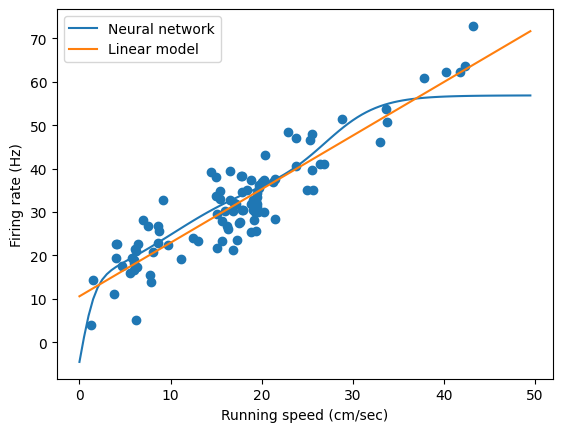

In [57]:
plt.scatter(speed,rate)
plt.plot(t_range.numpy(),nn_yhat.detach().numpy(),label="Neural network")
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

### Neural networks can model all sorts of functions

Let's try our two models on some non-linear problems

In [75]:
X = torch.arange(0,10,0.1).unsqueeze(1)
print(X.shape)
y = torch.sin(X)*4 + torch.randn(100, 1)

torch.Size([100, 1])


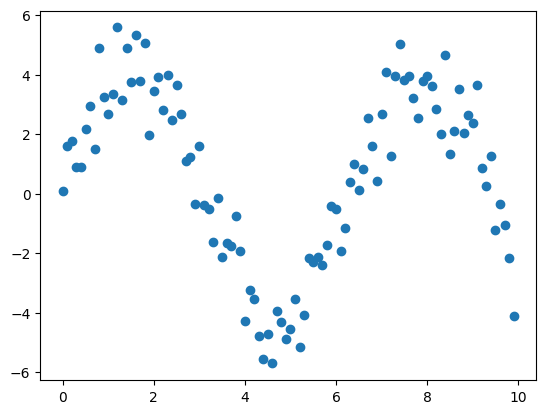

In [76]:
plt.scatter(X.numpy(),y.numpy())

In [77]:
learning_rate=0.001
optimizer = optim.SGD(nn_model.parameters(),lr=learning_rate)
training_loop(n_epochs = 40000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=nn_model,
              X = X,
              y=y)

Epoch: 0, Loss: 277.22149658203125
Epoch: 1, Loss: 27.86119842529297
Epoch: 2, Loss: 25.19709014892578
Epoch: 3, Loss: 23.050064086914062
Epoch: 4, Loss: 21.283794403076172
Epoch: 5, Loss: 19.806684494018555
Epoch: 6, Loss: 18.55467414855957
Epoch: 7, Loss: 17.481487274169922
Epoch: 8, Loss: 16.552810668945312
Epoch: 9, Loss: 15.742602348327637
Epoch: 1000, Loss: 6.342592239379883
Epoch: 2000, Loss: 6.162133693695068
Epoch: 3000, Loss: 5.939815044403076
Epoch: 4000, Loss: 4.832554817199707
Epoch: 5000, Loss: 3.876502752304077
Epoch: 6000, Loss: 3.1733412742614746
Epoch: 7000, Loss: 2.8581414222717285
Epoch: 8000, Loss: 2.7315173149108887
Epoch: 9000, Loss: 2.650932550430298
Epoch: 10000, Loss: 2.5849993228912354
Epoch: 11000, Loss: 2.52431058883667
Epoch: 12000, Loss: 2.465627908706665
Epoch: 13000, Loss: 2.4086906909942627
Epoch: 14000, Loss: 2.3547306060791016
Epoch: 15000, Loss: 2.305392265319824
Epoch: 16000, Loss: 2.2618110179901123
Epoch: 17000, Loss: 2.224240779876709
Epoch: 180

In [78]:
learning_rate=0.001
optimizer = optim.SGD(lin_model.parameters(),lr=learning_rate)
training_loop(n_epochs = 40000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=lin_model,
              X = X,
              y=y)

Epoch: 0, Loss: 279.4608154296875
Epoch: 1, Loss: 246.93887329101562
Epoch: 2, Loss: 218.63681030273438
Epoch: 3, Loss: 194.0067138671875
Epoch: 4, Loss: 172.57192993164062
Epoch: 5, Loss: 153.91749572753906
Epoch: 6, Loss: 137.6824493408203
Epoch: 7, Loss: 123.55264282226562
Epoch: 8, Loss: 111.25481414794922
Epoch: 9, Loss: 100.55107116699219
Epoch: 1000, Loss: 16.22309112548828
Epoch: 2000, Loss: 11.439046859741211
Epoch: 3000, Loss: 9.666011810302734
Epoch: 4000, Loss: 9.008905410766602
Epoch: 5000, Loss: 8.765372276306152
Epoch: 6000, Loss: 8.675114631652832
Epoch: 7000, Loss: 8.6416654586792
Epoch: 8000, Loss: 8.629268646240234
Epoch: 9000, Loss: 8.624673843383789
Epoch: 10000, Loss: 8.622971534729004
Epoch: 11000, Loss: 8.622340202331543
Epoch: 12000, Loss: 8.622106552124023
Epoch: 13000, Loss: 8.622018814086914
Epoch: 14000, Loss: 8.621988296508789
Epoch: 15000, Loss: 8.62197494506836
Epoch: 16000, Loss: 8.621971130371094
Epoch: 17000, Loss: 8.621969223022461
Epoch: 18000, Loss

In [79]:
t_range = torch.arange(0,10,0.2).unsqueeze(1)
t_range.shape

torch.Size([50, 1])

In [80]:
lin_yhat = lin_model(t_range)
nn_yhat = nn_model(t_range)

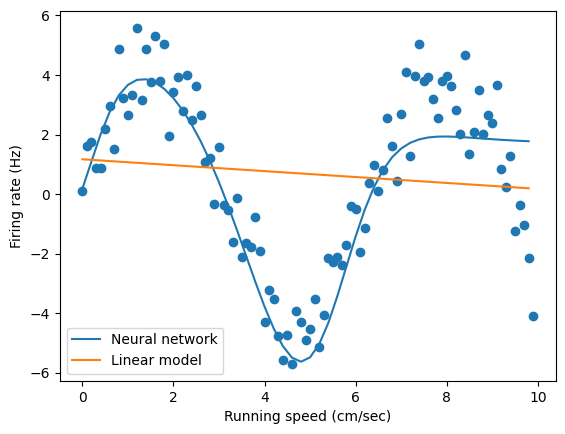

In [81]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(t_range.numpy(),nn_yhat.detach().numpy(),label="Neural network")
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

The non-linearity in the artifical neurons makes it possible to fit all sorts of function.

Here, the neural network is a better approximation of the underlying data. 

## Exercise

### Improve our neural network model

Our neural network is good but it is not perfect. 

How could you modify this model to make it fit the data more closely?

Have a go at trying to improve its predictions.

## Adding more hidden layers to create a deep neural network

**Deep neural networks** have several hidden layers.

* The output of the first layer have a shape similar to the activiation function.
* The next level can combine the inputs of the first layers to create more complex functions.


Text(0, 0.5, 'output')

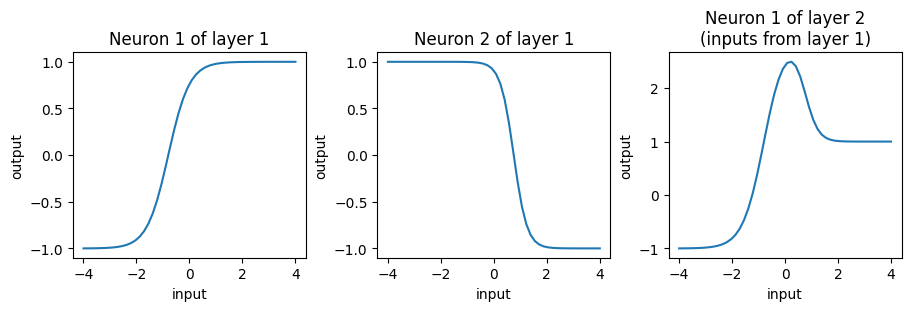

In [82]:
nrow=1
ncol=3
fig, ax = plt.subplots(nrow,ncol,figsize=(9,3),layout='constrained')

XX = np.linspace(-4,4) # input
      
# 
w1=1.25
b1=1.0                
ax[0].plot(XX,np.tanh(w1*XX+b1))
ax[0].set_title("Neuron 1 of layer 1")
ax[0].set_xlabel("input")
ax[0].set_ylabel("output")

w2=-2
b2=1.5
ax[1].plot(XX,np.tanh(w2*XX+b2))
ax[1].set_title("Neuron 2 of layer 1")
ax[1].set_xlabel("input")
ax[1].set_ylabel("output")

w3=[2,1]
b3=2
ax[2].plot(XX,w3[0]*np.tanh(w1*XX+b1)+ w3[1]*np.tanh(w2*XX+b2))
ax[2].set_title("Neuron 1 of layer 2\n(inputs from layer 1)")
ax[2].set_xlabel("input")
ax[2].set_ylabel("output")

In [83]:
class DNN_model(nn.Module):
    """
    Class to create pytorch model. This is a neural network because of the non-linear function.
    """
    def __init__(self):
        """
        Initializer. Runs when an object is created
        """
        super().__init__()
        self.layer1 = nn.Linear(in_features=1, out_features=10, bias=True)
        self.layer2 = nn.Linear(in_features=10, out_features=10, bias=True)
        self.layer3 = nn.Linear(in_features=10, out_features=1, bias=True)
        self.tanh = nn.Tanh()
        
        
    def forward(self,x):
        """
        Make predictions with our model
        """
        out = self.tanh(self.layer1(x))
        out = self.tanh(self.layer2(out))
        out = self.layer3(out)
        
        return out

In [84]:
dnn_model = DNN_model()

In [85]:
for name, p in dnn_model.named_parameters():
    print(name,p)

layer1.weight Parameter containing:
tensor([[-0.5452],
        [ 0.4509],
        [-0.4931],
        [ 0.7930],
        [ 0.2965],
        [-0.3349],
        [ 0.8105],
        [ 0.2632],
        [ 0.5213],
        [-0.2699]], requires_grad=True)
layer1.bias Parameter containing:
tensor([-0.8784, -0.3541,  0.6956,  0.5099, -0.6336,  0.2737,  0.4574, -0.3325,
         0.6036,  0.4047], requires_grad=True)
layer2.weight Parameter containing:
tensor([[ 0.1203,  0.0977,  0.1637, -0.1551, -0.1816,  0.0396, -0.2592,  0.2352,
         -0.1403,  0.2937],
        [ 0.1058, -0.0568,  0.1120, -0.0548, -0.0616, -0.2672, -0.2220, -0.2181,
         -0.1372, -0.0817],
        [-0.1792,  0.0799, -0.2273,  0.1872,  0.0597,  0.1685,  0.1505,  0.3025,
          0.0170, -0.0653],
        [ 0.2767, -0.2494, -0.2434, -0.0298,  0.2244,  0.1010, -0.2096,  0.1195,
          0.0612, -0.0067],
        [ 0.0575, -0.1980,  0.0626,  0.0619,  0.1662,  0.0706, -0.1768,  0.0832,
          0.1317, -0.2750],
        [ 0

In [86]:
print("Number of parameters:", sum(p.numel() for p in dnn_model.parameters()))

Number of parameters: 141


In [87]:
learning_rate=0.001
optimizer = optim.SGD(dnn_model.parameters(),lr=learning_rate)
training_loop(n_epochs = 40000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=dnn_model,
              X = X,
              y=y)

Epoch: 0, Loss: 9.196499824523926
Epoch: 1, Loss: 9.191637992858887
Epoch: 2, Loss: 9.186836242675781
Epoch: 3, Loss: 9.182092666625977
Epoch: 4, Loss: 9.177404403686523
Epoch: 5, Loss: 9.172776222229004
Epoch: 6, Loss: 9.168201446533203
Epoch: 7, Loss: 9.163681030273438
Epoch: 8, Loss: 9.159215927124023
Epoch: 9, Loss: 9.154801368713379
Epoch: 1000, Loss: 7.556285858154297
Epoch: 2000, Loss: 6.378616809844971
Epoch: 3000, Loss: 4.712522983551025
Epoch: 4000, Loss: 3.467219591140747
Epoch: 5000, Loss: 2.736327886581421
Epoch: 6000, Loss: 2.2956223487854004
Epoch: 7000, Loss: 2.082674026489258
Epoch: 8000, Loss: 1.9845260381698608
Epoch: 9000, Loss: 1.914404273033142
Epoch: 10000, Loss: 1.8565939664840698
Epoch: 11000, Loss: 1.8030685186386108
Epoch: 12000, Loss: 1.7485721111297607
Epoch: 13000, Loss: 1.6897166967391968
Epoch: 14000, Loss: 1.6227781772613525
Epoch: 15000, Loss: 1.5416637659072876
Epoch: 16000, Loss: 1.443560004234314
Epoch: 17000, Loss: 1.3389942646026611
Epoch: 18000, 

In [88]:
lin_yhat = lin_model(t_range)
nn_yhat = nn_model(t_range)
dnn_yhat = dnn_model(t_range)

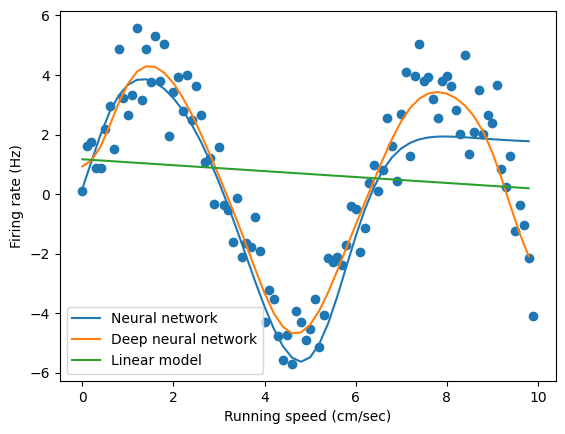

In [89]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(t_range.numpy(),nn_yhat.detach().numpy(),label="Neural network")
plt.plot(t_range.numpy(),dnn_yhat.detach().numpy(),label="Deep neural network")
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

# Exercise (Homework)

Train a neural network that would predict the firing rate of a neuron based on speed and acceleration.

The X tensor will have to have a shape of (27304,2)


In [86]:
fn = "../data/animal_acceleration.npy"
acceleration = np.load(fn)

fn = "../data/animal_speed.npy"
speed = np.load(fn)

fn =  "../data/y_rate.npy"
rate = np.load(fn)

In [87]:
rate.shape

(27304,)

Text(0, 0.5, 'Firing rate (Hz)')

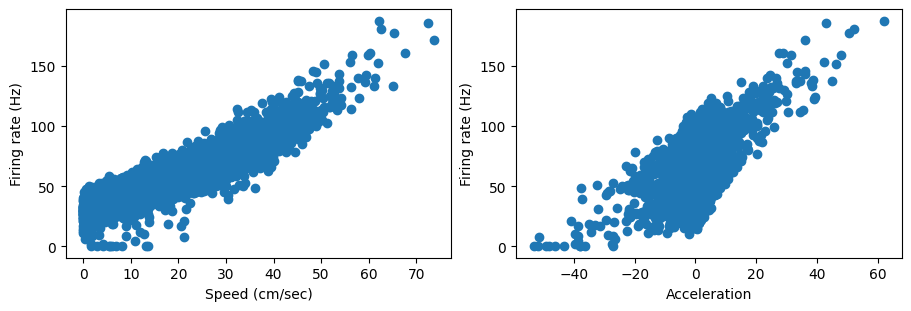

In [88]:
nrow=1
ncol=2
fig, ax = plt.subplots(nrow,ncol,figsize=(9,3),layout='constrained')

ax[0].scatter(speed,rate)
ax[0].set_xlabel("Speed (cm/sec)")
ax[0].set_ylabel("Firing rate (Hz)")
ax[1].scatter(acceleration,rate)
ax[1].set_xlabel("Acceleration")
ax[1].set_ylabel("Firing rate (Hz)")